In [6]:
import pandas as pd


In [8]:
# How can we optimize carrier selection and origin port selection for shipments to PORT09 to reduce shipping costs
#and maintain timely delivery within a single operational day?
#Load the data from the Excel file
file_path = '/Users/krishg/Downloads/Supply chain logisitcs problem.xlsx'  # Update this path
freight_rates = pd.read_excel(file_path, sheet_name='FreightRates')
order_list = pd.read_excel(file_path, sheet_name='OrderList')
wh_costs = pd.read_excel(file_path, sheet_name='WhCosts')


In [9]:
#Check for nulls
# Display rows with one or more null values
null_countf = freight_rates.isnull().sum()
null_countf
null_counto = order_list.isnull().sum()
null_counto

Order ID                0
Order Date              0
Origin Port             0
Carrier                 0
TPT                     0
Service Level           0
Ship ahead day count    0
Ship Late Day count     0
Customer                0
Product ID              0
Plant Code              0
Destination Port        0
Unit quantity           0
Weight                  0
dtype: int64

In [10]:
freight_rates

,Carrier,orig_port_cd,dest_port_cd,minm_wgh_qty,max_wgh_qty,svc_cd,minimum cost,rate,mode_dsc,tpt_day_cnt,Carrier type
0,V444_6,PORT08,PORT09,250.0,499.99,DTD,43.2272,0.7132,AIR,2,V88888888_0
1,V444_6,PORT08,PORT09,65.0,69.99,DTD,43.2272,0.7512,AIR,2,V88888888_0
2,V444_6,PORT08,PORT09,60.0,64.99,DTD,43.2272,0.7892,AIR,2,V88888888_0
3,V444_6,PORT08,PORT09,50.0,54.99,DTD,43.2272,0.8272,AIR,2,V88888888_0
4,V444_6,PORT08,PORT09,35.0,39.99,DTD,43.2272,1.0552,AIR,2,V88888888_0
...,...,...,...,...,...,...,...,...,...,...,...
1535,V444_8,PORT03,PORT09,0.0,99.99,DTD,29.3392,0.4116,AIR,0,V88888888_0
1536,V444_8,PORT03,PORT09,500.0,1999.99,DTD,29.3392,0.3112,AIR,0,V88888888_0
1537,V444_8,PORT03,PORT09,250.0,499.99,DTD,29.3392,0.4116,AIR,0,V88888888_0
1538,V444_8,PORT03,PORT09,2000.0,99999.99,DTD,29.3392,0.3112,AIR,0,V88888888_0


In [11]:
order_list

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.300000
1,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.940000
2,1.447139e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.200000
3,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.160000
4,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9210,1.447305e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683388,PLANT03,PORT09,339,2.354118
9211,1.447319e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683388,PLANT03,PORT09,339,2.354118
9212,1.447322e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683388,PLANT03,PORT09,245,0.294265
9213,1.447145e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683430,PLANT03,PORT09,278,2.480000


In [12]:
# Descriptive statistics
print(freight_rates.describe())
print(order_list.describe())

       minm_wgh_qty   max_wgh_qty  minimum cost         rate  tpt_day_cnt
count   1540.000000   1540.000000   1540.000000  1540.000000  1540.000000
mean     155.886637   4636.143633     12.329033     2.892656     2.186364
std      475.952049  20251.309727     22.946192     4.603877     2.000895
min        0.000000      0.453592      1.202000     0.033200     0.000000
25%       15.010000     21.500000      3.656800     0.470400     1.000000
50%       41.010000     47.500000      7.417000     1.661200     2.000000
75%       67.229614     99.990000     11.494500     3.932200     2.000000
max    10000.000000  99999.990000    425.027200   128.027200    14.000000
           Order ID          TPT  Ship ahead day count  Ship Late Day count  \
count  9.215000e+03  9215.000000           9215.000000          9215.000000   
mean   1.447274e+09     1.717743              1.852306             0.039935   
std    8.381629e+04     0.630500              1.922302             0.319625   
min    1.447126e+0

In [13]:
# Check for unique values, ranges, or anomalies
print(freight_rates.nunique())
print(order_list.nunique())

Carrier            9
orig_port_cd      10
dest_port_cd       1
minm_wgh_qty     328
max_wgh_qty      327
svc_cd             2
minimum cost     787
rate            1029
mode_dsc           2
tpt_day_cnt        8
Carrier type       2
dtype: int64
Order ID                9215
Order Date                 1
Origin Port                3
Carrier                    3
TPT                        5
Service Level              3
Ship ahead day count       5
Ship Late Day count        4
Customer                  46
Product ID               772
Plant Code                 7
Destination Port           1
Unit quantity           2624
Weight                  5899
dtype: int64


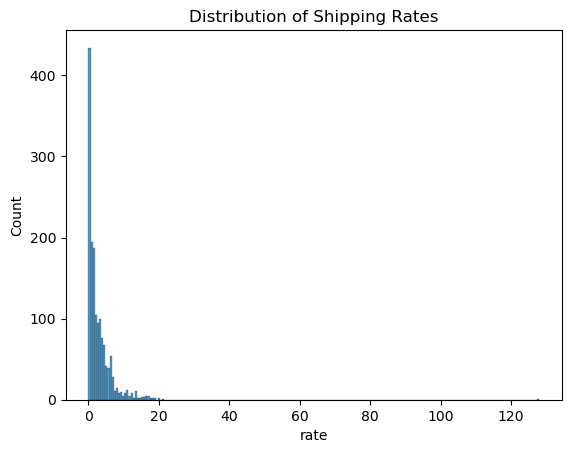

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of shipping costs
sns.histplot(freight_rates['rate'])
plt.title('Distribution of Shipping Rates')
plt.show()

In [15]:
#There is a Carrier V44_3 in OrderList table, but it is missing in the FreightRates table? V44_3 is a carrier that
#was historically used for supplying given demand, but since it has been discontinued and therefore do not appear in the Freight Rates List.
#Also, all of the V44_3 instances are CRF - i.e. customer arranges their own shipping and hence cost is not calculated either way.
#This means that we need to remove all crf data because we cannot calculate shipping costs for them


# Filter out orders with a service level of 'CRF'
order_list = order_list[order_list['Service Level'] != 'CRF']


In [16]:
# Define the specific characteristics to filter out
specific_carrier = 'V444_1'
specific_origin_port = 'PORT04'
specific_destination_port = 'PORT09'
specific_service_level = 'DTD'

# Filter out rows that match these characteristics
order_list = order_list[~((order_list['Carrier'] == specific_carrier) &
                          (order_list['Origin Port'] == specific_origin_port) &
                          (order_list['Destination Port'] == specific_destination_port) &
                          (order_list['Service Level'] == specific_service_level))]

# Now you can proceed with further processing on this updated DataFrame


In [17]:
#Calculation of cost for each order without modelling
# Define the function to calculate transportation cost
def calculate_transportation_cost(order, freight_rates):
    order_weight = order['Weight']
    order_carrier = order['Carrier']
    origin_port = order['Origin Port']
    destination_port = order['Destination Port']

    # Filter freight rates for the specific carrier and port combination
    applicable_rates = freight_rates[(freight_rates['Carrier'] == order_carrier) &
                                     (freight_rates['orig_port_cd'] == origin_port) &
                                     (freight_rates['dest_port_cd'] == destination_port)]

    # Find the rate row where the order weight falls within the weight range
    rate_row = applicable_rates[(applicable_rates['minm_wgh_qty'] <= order_weight) &
                                (applicable_rates['max_wgh_qty'] >= order_weight)]

    # Calculate the transportation cost
    if not rate_row.empty:
        rate = rate_row.iloc[0]['rate']
        minimum_cost = rate_row.iloc[0]['minimum cost']
        transportation_cost = max(minimum_cost, rate * order_weight)
        return transportation_cost
    else:
        return 0  # or any appropriate default value or action
# Function to calculate warehouse cost
def calculate_warehouse_cost(order, wh_costs):
    plant_code = order['Plant Code']
    unit_quantity = order['Unit quantity']
    warehouse_cost_row = wh_costs[wh_costs['WH'] == plant_code]

    if not warehouse_cost_row.empty:
        cost_per_unit = warehouse_cost_row.iloc[0]['Cost/unit']
        warehouse_cost = cost_per_unit * unit_quantity
        return warehouse_cost
    else:
        return 0  # or any appropriate default value or action

# Function to calculate total logistics cost (transportation + warehouse)
def calculate_total_logistics_cost(order, freight_rates, wh_costs):
    transportation_cost = calculate_transportation_cost(order, freight_rates)
    warehouse_cost = calculate_warehouse_cost(order, wh_costs)
    total_cost = transportation_cost + warehouse_cost
    return total_cost
# Calculate total logistics cost for each order in the order_list DataFrame
order_list['Total Logistics Cost'] = order_list.apply(lambda x: calculate_total_logistics_cost(x, freight_rates, wh_costs), axis=1)



In [18]:
print(order_list)

          Order ID Order Date Origin Port Carrier  TPT Service Level  \
854   1.447385e+09 2013-05-26      PORT09  V444_0    0           DTP   
855   1.447338e+09 2013-05-26      PORT09  V444_0    0           DTP   
856   1.447407e+09 2013-05-26      PORT09  V444_0    0           DTP   
857   1.447154e+09 2013-05-26      PORT09  V444_0    0           DTP   
858   1.447163e+09 2013-05-26      PORT09  V444_0    0           DTP   
...            ...        ...         ...     ...  ...           ...   
7113  1.447393e+09 2013-05-26      PORT04  V444_0    2           DTP   
7114  1.447211e+09 2013-05-26      PORT04  V444_0    2           DTP   
7115  1.447324e+09 2013-05-26      PORT04  V444_0    2           DTP   
7116  1.447163e+09 2013-05-26      PORT04  V444_0    2           DTP   
7117  1.447383e+09 2013-05-26      PORT04  V444_0    2           DTP   

      Ship ahead day count  Ship Late Day count   Customer  Product ID  \
854                      0                    0   V55555_4   

In [19]:
# Filter the order_list DataFrame to find rows where the Transportation Cost is 0
zero_cost_orders = order_list[order_list['Total Logistics Cost'] == 0]

# Display these rows
print(zero_cost_orders)


Empty DataFrame
Columns: [Order ID, Order Date, Origin Port, Carrier, TPT, Service Level, Ship ahead day count, Ship Late Day count, Customer, Product ID, Plant Code, Destination Port, Unit quantity, Weight, Total Logistics Cost]
Index: []


In [20]:
# Check for unmatched carriers or ports
unique_carriers_ports = zero_cost_orders[['Carrier', 'Origin Port', 'Destination Port','Service Level']].drop_duplicates()
print("Unique carriers and ports in orders with zero cost:")
print(unique_carriers_ports)

Unique carriers and ports in orders with zero cost:
Empty DataFrame
Columns: [Carrier, Origin Port, Destination Port, Service Level]
Index: []


For Carrier V441_1 Origin Port04 -> Destination Port 09 with DTD service level it was found that there is no corresponding weight category to refer to on the freight rates so we will be filtering out these values for accurate analysis but will try mutating upon further analysis.
Also, warehouse costs is associated only with this case "V441_1 Origin Port04 -> Destination Port 09 with DTD service level " so removing this case also eliminates the need to include warehouse costs to our calculation of transportation costs.

In [21]:
print(order_list.index)


Int64Index([ 854,  855,  856,  857,  858,  859,  860,  861,  862,  863,
            ...
            7108, 7109, 7110, 7111, 7112, 7113, 7114, 7115, 7116, 7117],
           dtype='int64', length=6264)


Move on to modelling: we will be using 3 models to assign


A key point to take note of is the discrepancy noted between the number of orders processed by Plant03 in the OrderList (8541 orders) and its listed capacity in WhCapacities (1013 orders per day) is indeed significant and can have implications on our analysis. Hence it would be best if we assume the plant assignment.
Here are some assumptions
Products per plant is fixed because these manufacturing plants can only  manufacture specific range of products which is why in Whcosts there is a fixed price attached per unit for each plant. Assignment cannot happen with plants however assignment can happen when you are assigning the order from the plant to the right port that can cause change in transportation cost.

All origin port lead to port 9 so the assignment would be for an origin port from a fixed plant that can reduce overall transporation costs. The constrains would be the productsperplant and the assumption is that all assigned ports cost the same from any one plant to any one port because we do not have data on the relationship around distance or cost to transport from one plant to other ports other than plantports which we are trying to challenge to find better assignment options. Another assumption would be the carrier is able to transport all products.


In [22]:
!pip install pulp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 21.6 MB/s eta 0:00:0000:0100:01


In [23]:
#Linear Programming
import pulp

# Initialize the linear programming problem
lp_problem = pulp.LpProblem("MinimizeTotalLogisticsCosts", pulp.LpMinimize)

# Decision Variables: Create a binary variable for each order, carrier, and origin port combination
assignment_vars = pulp.LpVariable.dicts("Assignment",
                                        ((order_id, carrier, origin_port)
                                         for order_id in order_list['Order ID']
                                         for carrier in freight_rates['Carrier'].unique()
                                         for origin_port in freight_rates['orig_port_cd'].unique()),
                                        cat='Binary')

# Objective Function: Minimize the total logistics cost (transportation + warehouse)
lp_problem += pulp.lpSum([assignment_vars[order_id, carrier, origin_port] *
                          calculate_total_logistics_cost(order_list[order_list['Order ID'] == order_id].iloc[0], freight_rates, wh_costs)
                          for order_id in order_list['Order ID']
                          for carrier in freight_rates['Carrier'].unique()
                          for origin_port in freight_rates['orig_port_cd'].unique()])

# Constraint: Each order must be assigned to exactly one carrier and one origin port
for order_id in order_list['Order ID']:
    lp_problem += pulp.lpSum([assignment_vars[order_id, carrier, origin_port]
                              for carrier in freight_rates['Carrier'].unique()
                              for origin_port in freight_rates['orig_port_cd'].unique()]) == 1

# Solve the problem
lp_problem.solve()

# Extract the results
assignments = {}
for order_id in order_list['Order ID']:
    for carrier in freight_rates['Carrier'].unique():
        for origin_port in freight_rates['orig_port_cd'].unique():
            if pulp.value(assignment_vars[order_id, carrier, origin_port]) == 1:
                assignments[order_id] = (carrier, origin_port)

# assignments now contains the optimized carrier and origin port assignment for each order



Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/krishg/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/mf/hl3nn1896_g_b4vwgxdmzvqh0000gn/T/77d2a6b3b7b04e169c948e24a6ce9dd5-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/mf/hl3nn1896_g_b4vwgxdmzvqh0000gn/T/77d2a6b3b7b04e169c948e24a6ce9dd5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 6269 COLUMNS
At line 2261310 RHS
At line 2267575 BOUNDS
At line 2831336 ENDATA
Problem MODEL has 6264 rows, 563760 columns and 563760 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 1.23232e+07 - 0.19 seconds
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from 1.23232e+07 to -1.79769e+308
Probing was tried 0 times

In [24]:
#calculate logistics cost with the new assignment from linear programming

def calculate_optimized_logistics_cost(order_id, assignments, freight_rates, wh_costs):
    # Retrieve the optimized carrier and origin port for the order
    carrier, origin_port = assignments[order_id]
    order = order_list[order_list['Order ID'] == order_id].iloc[0]
    destination_port = order['Destination Port']
    order_weight = order['Weight']

    # Filter freight rates for the optimized carrier and port combination
    applicable_rates = freight_rates[(freight_rates['Carrier'] == carrier) &
                                     (freight_rates['orig_port_cd'] == origin_port) &
                                     (freight_rates['dest_port_cd'] == destination_port)]

    # Find the rate row where the order weight falls within the weight range
    rate_row = applicable_rates[(applicable_rates['minm_wgh_qty'] <= order_weight) &
                                (applicable_rates['max_wgh_qty'] >= order_weight)]

    # Calculate the transportation cost
    if not rate_row.empty:
        rate = rate_row.iloc[0]['rate']
        minimum_cost = rate_row.iloc[0]['minimum cost']
        transportation_cost = max(minimum_cost, rate * order_weight)
    else:
        transportation_cost = 0  # Handle cases where no matching rate is found

    # Calculate warehouse cost
    warehouse_cost = calculate_warehouse_cost(order, wh_costs)

    # Total logistics cost (transportation + warehouse)
    total_logistics_cost = transportation_cost + warehouse_cost
    return total_logistics_cost

# Calculate total logistics cost for each order in the order_list DataFrame for optimized assignments
order_list['Optimized Total Logistics Cost_LP'] = [calculate_optimized_logistics_cost(order_id, assignments, freight_rates, wh_costs)
                                                   for order_id in order_list['Order ID']]



In [25]:
# Group by Customer and sum the total logistics costs for each customer (original)
original_total_costs_by_customer = order_list.groupby('Customer')['Total Logistics Cost'].sum()

# Group by Customer and sum the total logistics costs for each customer (optimized with linear programming)
optimized_total_costs_by_customer_LP = order_list.groupby('Customer')['Optimized Total Logistics Cost_LP'].sum()

# Display the results
print("Original Total Costs by Customer:")
print(original_total_costs_by_customer)
print("\nOptimized Total Costs by Customer (Linear Programming):")
print(optimized_total_costs_by_customer_LP)




Original Total Costs by Customer:
Customer
V555555555555555555_42    2.436566e+05
V555555555555555_29       5.410638e+04
V55555555555_28           2.739462e+06
V5555555555_1             3.465666e+03
V555555555_14             4.255753e+05
V555555555_27             3.646540e+05
V555555555_3              4.122047e+04
V555555555_35             2.383341e+03
V55555555_0               3.361205e+04
V55555555_5               4.159178e+06
V55555555_7               4.733756e+05
V5555555_12               2.195573e+04
V5555555_22               4.236920e+04
V5555555_30               7.128492e+04
V555555_24                5.042170e+04
V555555_34                3.357070e+03
V555555_40                6.814435e+03
V555555_6                 7.072033e+05
V55555_2                  7.490503e+05
V55555_26                 9.897665e+05
V55555_4                  2.158791e+05
V5555_25                  2.496540e+04
V5555_33                  1.322226e+05
V5555_36                  4.822820e+05
V5555_38             

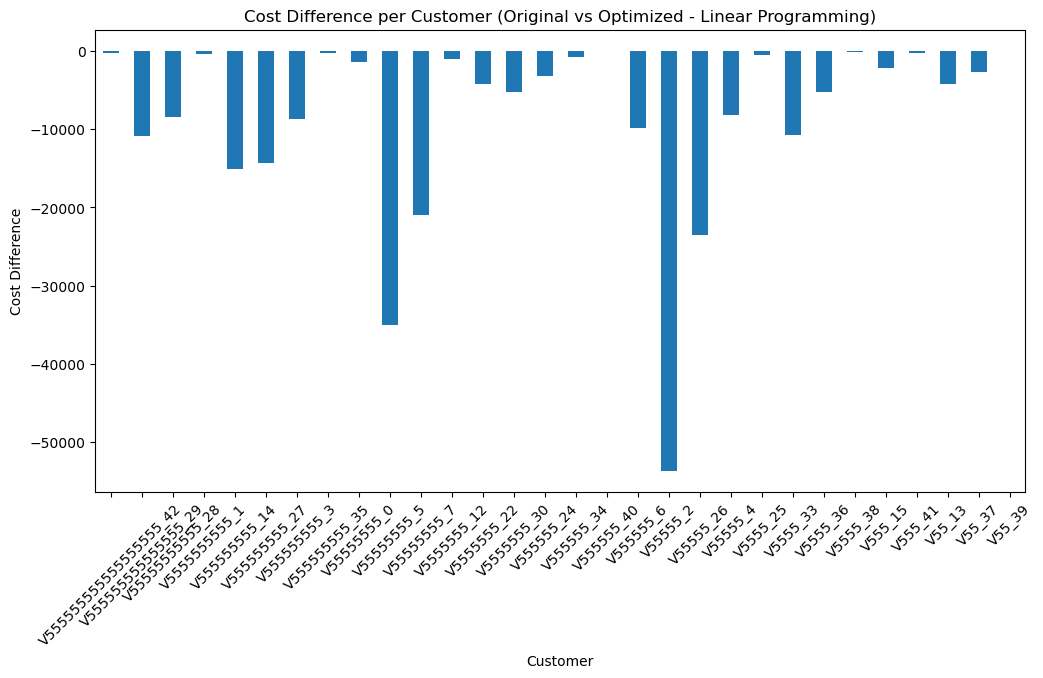

In [26]:
import matplotlib.pyplot as plt

# Calculate the difference in costs
cost_difference_by_customer_LP = original_total_costs_by_customer - optimized_total_costs_by_customer_LP

# Plotting a bar graph
plt.figure(figsize=(12, 6))
cost_difference_by_customer_LP.plot(kind='bar')
plt.title('Cost Difference per Customer (Original vs Optimized - Linear Programming)')
plt.xlabel('Customer')
plt.ylabel('Cost Difference')
plt.xticks(rotation=45)
plt.show()



In [27]:
!pip install simpy

  Obtaining dependency information for simpy from https://files.pythonhosted.org/packages/48/72/920ed1224c94a8a5a69e6c1275ac7fe4eb911ba8feffddf469f1629d47f3/simpy-4.1.1-py3-none-any.whl.metadata


In [28]:
#Discrete Event Simulation
#Since your data covers one day, you would typically run your simulation for a time unit that represents one day.
#The env.run(until=24) statement indicates the simulation runs for '24' units of time, which could be hours or another appropriate unit.
import simpy

# Define a function to find the carrier and port with the lowest total logistics cost
def find_best_carrier_and_port(order, freight_rates, wh_costs):
    min_cost = float('inf')
    best_carrier = None
    best_origin_port = None

    for carrier in freight_rates['Carrier'].unique():
        for origin_port in freight_rates['orig_port_cd'].unique():
            # Temporarily assign this carrier and origin port to the order for cost calculation
            order['Carrier'] = carrier
            order['Origin Port'] = origin_port

            # Calculate total logistics cost for this assignment
            total_cost = calculate_total_logistics_cost(order, freight_rates, wh_costs)

            # Check if this is the lowest cost so far
            if total_cost < min_cost:
                min_cost = total_cost
                best_carrier = carrier
                best_origin_port = origin_port

    return best_carrier, best_origin_port

def order_process(env, order_id, order_details, freight_rates, wh_costs, cost_dict):


    # Simulate some processing time
    yield env.timeout(0.5)  # Example: 30 minutes for processing

    # Find the best carrier and port
    carrier, origin_port = find_best_carrier_and_port(order_details, freight_rates, wh_costs)
    print(f"Order {order_id} assigned to carrier {carrier} and origin port {origin_port} at time {env.now}")

    # Simulate transportation time
    yield env.timeout(2)  # Example: 2 hours for transportation

     # Calculate and store the total logistics cost for this order
    total_cost = calculate_total_logistics_cost(order_details, freight_rates, wh_costs)
    cost_dict[order_id] = total_cost

# Initialize a SimPy environment
env = simpy.Environment()

# Dictionary to store logistics costs for each order
logistics_costs = {}

    # Create a process for each order
for index, order in order_list.iterrows():
    env.process(order_process(env, order['Order ID'], order, freight_rates, wh_costs, logistics_costs))

# Run the simulation for one day
env.run(until=24)  # Assuming '24' represents the total operational hours in a day

# logistics_costs now contains the total logistics cost for each order
print(logistics_costs)


Order 1447385217.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447337778.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447406947.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447154164.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447163388.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447213716.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447153522.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447368703.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447213717.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447213715.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447157081.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447217764.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447157082.7 assigned 

Order 1447243154.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447265487.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447164688.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447305601.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447149216.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447174176.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447189289.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447191612.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447305600.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447183328.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447223074.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447384224.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447162330.7 assigned 

Order 1447226800.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447206054.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447306316.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447306312.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447306315.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447306314.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447183286.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447183284.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447183283.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447171025.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447183285.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447180395.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447183282.7 assigned 

Order 1447282658.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447381347.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447200754.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447327244.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447327257.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447381351.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447327255.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447308847.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447327248.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447327254.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447308850.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447381346.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447381354.7 assigned 

Order 1447339226.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447339228.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447339227.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447339230.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447214232.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447214240.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447339229.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447388151.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447282648.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447308839.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447327235.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447214234.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447308842.7 assigned 

Order 1447288819.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447354716.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447240227.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447394616.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447353038.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447230394.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447265704.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447188576.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447188579.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447192328.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447339823.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447251054.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447330600.7 assigned 

Order 1447400428.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447267003.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447167595.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447353781.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447255617.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447238354.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447365183.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447230417.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447226354.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447201747.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447157752.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447400429.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447314023.7 assigned 

Order 1447389084.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447389091.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447283725.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447389090.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447421012.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447357415.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447375137.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447390305.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447413935.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447395058.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447313858.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447227098.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447400483.7 assigned 

Order 1447155220.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447409173.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447351879.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447342389.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447312018.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447258883.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447340936.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447326107.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447300854.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447211457.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447222990.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447409161.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447320210.7 assigned 

Order 1447329591.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447355457.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447221881.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447334705.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447225248.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447384428.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447384423.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447250084.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447394310.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447283823.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447258890.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447363164.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447229524.7 assigned 

Order 1447254366.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447377053.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447372974.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447221836.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447280065.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447229515.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447282076.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447394304.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447299063.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447304366.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447151665.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447155221.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447221837.7 assigned 

Order 1447385486.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447312016.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447304364.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447300852.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447377047.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447232382.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447394302.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447308354.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447407392.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447292031.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447351801.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447274824.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447322796.7 assigned 

Order 1447384421.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447377049.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447229523.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447194637.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447280067.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447368077.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447384420.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447377048.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447250468.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447232392.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447246444.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447191296.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447258886.7 assigned 

Order 1447310710.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447228699.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447418238.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447377351.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447367119.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447372981.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447145769.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447377350.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447418239.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447410672.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447157471.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447167432.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447408991.7 assigned 

Order 1447280990.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447377766.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447377765.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447356011.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447418576.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447334921.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447239936.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447377761.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447215353.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447401977.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447239935.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447292188.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447215352.7 assigned 

Order 1447183407.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447373366.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447385815.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447283548.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447390880.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447405701.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447173726.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447195158.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447172399.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447195163.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447191812.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447265651.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447373400.7 assigned 

Order 1447172425.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447184517.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447224368.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447172432.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447172418.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447235312.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447305844.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447313982.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447172382.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447205224.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447235313.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447184701.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447305824.7 assigned 

Order 1447314014.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447172398.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447385931.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447373404.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447196799.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447411580.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447158133.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447274420.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447385930.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447172395.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447184524.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447184523.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447400362.7 assigned 

Order 1447373429.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447266859.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447373428.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447385938.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447174465.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447384260.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447301451.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447265578.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447174185.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447213261.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447265579.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447373402.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447261112.7 assigned 

Order 1447305839.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447293118.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447191814.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447305836.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447265660.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447274422.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447158114.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447170693.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447196644.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447183497.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447158115.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447241606.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447300220.7 assigned 

Order 1447195159.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447289694.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447195160.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447274426.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447167297.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447260689.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447373436.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447305845.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447204323.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447167296.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447225332.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447174669.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447373464.7 assigned 

Order 1447194891.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447174500.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447223364.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447159323.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447194890.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447159321.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447394113.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447194895.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447192278.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447369704.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447394111.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447335479.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447297184.7 assigned 

Order 1447397001.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447300033.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447231453.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447351802.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447316609.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447402326.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447397003.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447397002.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447300032.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447300031.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447310852.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447186835.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447222737.7 assigned 

Order 1447183461.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447167113.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447396712.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447232555.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447167112.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447266833.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447146891.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447304581.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447397000.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447304762.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447232400.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447377272.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447137209.7 assigned 

Order 1447329689.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447150647.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447229295.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447187440.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447281356.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447251022.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447373534.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447373537.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447305035.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447292369.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447193154.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447146545.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447335430.7 assigned 

Order 1447204142.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447146533.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447292368.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447220700.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447146539.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447146540.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447146531.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447288267.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447231115.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447348191.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447215330.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447371474.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447306672.7 assigned 

Order 1447242501.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447407927.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447357559.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447373536.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447305032.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447178955.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447168915.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447208161.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447339209.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447158073.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447195171.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447150985.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447325843.7 assigned 

Order 1447224403.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447205222.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447241607.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447225244.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447306671.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447231116.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447251021.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447224401.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447231114.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447183475.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447251020.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447357558.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447251019.7 assigned 

Order 1447278856.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447300175.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447218541.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447177712.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447243689.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447218547.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447283870.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447337715.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447300171.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447210181.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447337708.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447177717.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447321412.7 assigned 

Order 1447321351.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447320026.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447172945.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447321350.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447350617.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447153543.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447185859.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447172947.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447214068.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447288745.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447193509.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447287921.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447249174.7 assigned 

Order 1447218312.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447291252.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447357613.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447311495.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447266885.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447346490.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447175181.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447266947.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447165436.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447266860.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447399703.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447227078.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447346561.7 assigned 

Order 1447302848.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447283690.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447367946.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447179646.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447185760.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447283738.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447323943.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447283682.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447240908.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447165484.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447283656.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447367909.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447165368.7 assigned 

Order 1447185738.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447283649.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447149337.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447367880.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447367934.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447283037.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447323784.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447367883.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447283036.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447149320.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447185818.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447367910.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447283670.7 assigned 

Order 1447165428.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447389191.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447266950.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447323919.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447283688.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447323803.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447185795.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447283657.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447391186.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447389064.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447215397.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447283765.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447283696.7 assigned 

Order 1447137159.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447269698.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447269696.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447137167.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447152993.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447137165.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447137161.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447137158.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447269697.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447152992.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447152996.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447137164.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447269695.7 assigned 

Order 1447360925.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447382546.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447305236.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447382545.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447345010.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447410956.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447345009.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447360918.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447317052.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447382548.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447267039.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447317051.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447295518.7 assigned 

Order 1447403231.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447352440.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447317046.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447178899.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447360921.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447326518.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447178898.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447360923.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447305229.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447391530.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447317049.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447295516.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447167730.7 assigned 

Order 1447187876.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447201970.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447403132.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447391477.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447167733.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447339806.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447295515.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447167732.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447339804.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447284947.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447267046.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447305233.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447305234.7 assigned 

Order 1447365323.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447386481.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447307117.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447343673.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447307116.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447386483.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447386470.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447321404.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447321403.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447293679.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447296419.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447292436.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447323157.7 assigned 

Order 1447196800.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447266912.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447323871.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447163001.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447152755.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447265626.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447310506.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447163233.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447369902.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447152756.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447360768.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447357656.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447163002.7 assigned 

Order 1447231022.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447379010.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447151142.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447155229.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447286472.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447286439.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447162931.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447232860.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447313973.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447321323.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447210927.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447162915.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447232839.7 assigned 

Order 1447360806.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447377642.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447408445.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447178885.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447200254.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447374905.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447382182.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447381733.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447397661.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447397658.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447404197.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447397659.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447401664.7 assigned 

Order 1447152712.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447152367.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447269490.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447184529.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447163614.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447163740.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447163572.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447382154.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447163626.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447163628.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447163627.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447163616.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447152812.7 assigned 

Order 1447211822.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447185213.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447173732.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447152915.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447204419.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447178871.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447158161.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447173733.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447220229.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447326103.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447346547.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447160860.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447165086.7 assigned 

Order 1447306357.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447408720.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447299452.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447213173.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447346301.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447230851.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447360736.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447225179.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447304639.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447400256.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447400257.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447410986.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447199736.7 assigned 

Order 1447306512.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447371322.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447309538.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447242306.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447382054.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447159052.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447334094.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447205007.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447317760.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447174273.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447400341.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447205009.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447309539.7 assigned 

Order 1447292064.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447346261.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447167284.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447156190.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447255517.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447163364.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447293714.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447164398.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447275664.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447232721.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447225310.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447323908.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447330323.7 assigned 

Order 1447346148.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447397844.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447205763.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447346147.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447370916.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447163357.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447208235.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447211858.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447267329.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447224982.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447224944.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447138689.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447178872.7 assigned 

Order 1447269643.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447156639.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447346492.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447365767.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447266957.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447163449.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447204819.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447163450.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447204820.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447389132.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447290060.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447290055.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447375159.7 assigned 

Order 1447183505.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447179668.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447196796.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447374414.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447196771.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447346581.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447346600.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447159924.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447196794.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447323898.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447323873.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447290144.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447258785.7 assigned 

Order 1447194627.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447233393.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447184614.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447258851.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447353784.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447159977.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447198883.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447198882.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447336257.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447208878.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447390666.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447196645.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447357376.7 assigned 

Order 1447382152.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447355230.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447325628.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447346575.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447208879.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447295173.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447406927.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447219010.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447198422.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447166634.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447207102.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447376935.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447238364.7 assigned 

Order 1447326476.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447165085.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447296416.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447369731.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447326475.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447251218.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447288341.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447165074.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447251202.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447326474.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447165075.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447355528.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447197177.7 assigned 

Order 1447281322.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447224406.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447164785.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447281342.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447164798.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447164795.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447224428.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447199713.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447146787.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447171204.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447183519.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447423199.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447162971.7 assigned 

Order 1447251124.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447403672.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447192247.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447241403.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447204375.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447408826.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447408737.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447168028.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447411533.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447408827.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447411530.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447411498.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447188564.7 assigned 

Order 1447165286.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447408416.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447418954.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447162834.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447220639.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447418976.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447188083.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447251089.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447266946.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447194804.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447241412.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447200579.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447200580.7 assigned 

Order 1447423205.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447224505.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447302825.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447165490.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447312488.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447163019.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447241405.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447200574.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447183503.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447312508.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447241400.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447423169.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447241404.7 assigned 

Order 1447418379.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447281261.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447418373.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447300122.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447265530.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447418372.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447300082.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447265528.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447224317.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447224310.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447265527.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447418375.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447265518.7 assigned 

Order 1447236961.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447236960.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447146772.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447265563.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447227034.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447241399.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447164294.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447281318.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447227035.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447200583.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447200632.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447200617.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447200626.7 assigned 

Order 1447313086.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447258688.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447357343.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447350126.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447196594.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447142693.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447275574.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447293625.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447319265.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447159821.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447396757.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447238143.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447159822.7 assigned 

Order 1447276645.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447204108.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447183236.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447357312.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447329535.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447175573.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447407687.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447172372.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447329538.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447407689.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447175577.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447206006.7 assigned to carrier V444_6 and origin port PORT09 at time 0.5
Order 1447150323.7 assigned 

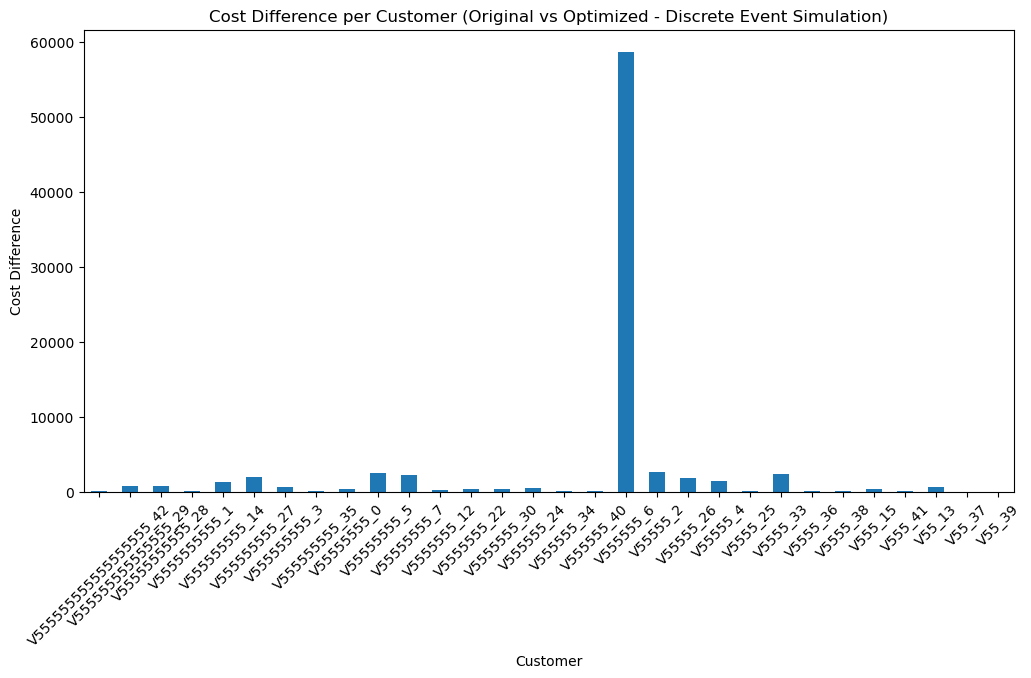

In [35]:

# Creating a DataFrame from the logistics_costs dictionary
des_costs_df = pd.DataFrame(list(logistics_costs.items()), columns=['Order ID', 'Logistics Cost_DES'])

# Merge this with the original order_list to associate each cost with the corresponding customer
merged_order_list = order_list.merge(des_costs_df, on='Order ID')

# Group by Customer and sum the logistics costs for each customer after DES simulation
optimized_total_costs_by_customer_DES = merged_order_list.groupby('Customer')['Logistics Cost_DES'].sum()

# Assuming original_total_costs_by_customer contains the summed original logistics costs per customer
# Calculate the difference in costs between the original and DES optimized costs
cost_difference_by_customer_DES = original_total_costs_by_customer - optimized_total_costs_by_customer_DES

# Plotting a bar graph
plt.figure(figsize=(12, 6))
cost_difference_by_customer_DES.plot(kind='bar')
plt.title('Cost Difference per Customer (Original vs Optimized - Discrete Event Simulation)')
plt.xlabel('Customer')
plt.ylabel('Cost Difference')
plt.xticks(rotation=45)
plt.show()


In [30]:
#genetic algorithm
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.6 MB/s eta 0:00:00 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for deap: filename=deap-1.4.1-cp311-cp311-macosx_11_0_arm64.whl size=103870 sha256=ca0bebf39e87ae12728fe984be32f2b019687d403a6455ece3a1913e1abbc85e
  Stored in directory: /Users/krishg/Library/Caches/pip/wheels/f8/64/b8/65eacfbff3024ae2e2beb22e691d5c8abb89fbd863b8049b5f
Successfully built deap


In [31]:
import random
from deap import base, creator, tools, algorithms
import pandas as pd

# Assign 'PORT09' as the Destination Port for all orders
order_list['Destination Port'] = 'PORT09'

# Define the fitness function
def evaluate_individual(individual):
    total_cost = 0
    for index, (carrier, origin_port) in enumerate(individual):
        # Create a copy of the order row and update carrier and origin port
        order_row = order_list.iloc[index].copy()
        order_row['Carrier'] = carrier
        order_row['Origin Port'] = origin_port

        # Calculate and accumulate cost
        total_cost += calculate_total_logistics_cost(order_row, freight_rates, wh_costs).item()
    return total_cost,


# Function to create a random carrier and port assignment
def random_assignment():
    carrier = random.choice(freight_rates['Carrier'].unique())
    port = random.choice(freight_rates['orig_port_cd'].unique())
    return carrier, port

# Setup the GA components
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_assignment", random_assignment)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_assignment, n=len(order_list))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate_individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.02)
toolbox.register("select", tools.selTournament, tournsize=3)

# Create the initial population
population = toolbox.population(n=100)

# Run the genetic algorithm
result = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, verbose=True)

# Extract the best individual
best_individual = tools.selBest(population, k=1)[0]
best_cost = evaluate_individual(best_individual)[0]

# Creating a new DataFrame with detailed order information
detailed_order_info = order_list.copy()
assigned_carriers = [carrier for carrier, port in best_individual]
assigned_ports = [port for carrier, port in best_individual]

detailed_order_info['Assigned Carrier'] = assigned_carriers
detailed_order_info['Assigned Origin Port'] = assigned_ports

individual_costs = [calculate_total_logistics_cost(detailed_order_info.iloc[i], freight_rates, wh_costs)
                    for i in range(len(detailed_order_info))]
detailed_order_info['Logistics Cost (GA)'] = individual_costs

# Print the best cost and display the detailed order information
print(f"Best Total Logistics Cost from GA: {best_cost}")
print(detailed_order_info)


gen	nevals
0  	100   
1  	67    
2  	58    
3  	74    
4  	57    
5  	61    
6  	65    
7  	55    
8  	64    
9  	64    
10 	49    
11 	51    
12 	54    
13 	52    
14 	65    
15 	60    
16 	54    
17 	61    
18 	68    
19 	57    
20 	66    
21 	56    
22 	64    
23 	61    
24 	70    
25 	71    
26 	62    
27 	61    
28 	67    
29 	54    
30 	64    
31 	60    
32 	59    
33 	69    
34 	55    
35 	65    
36 	64    
37 	63    
38 	64    
39 	52    
40 	64    
41 	60    
42 	72    
43 	61    
44 	60    
45 	45    
46 	58    
47 	51    
48 	57    
49 	60    
50 	58    
Best Total Logistics Cost from GA: 12319246.679868767
          Order ID Order Date Origin Port Carrier  TPT Service Level  \
854   1.447385e+09 2013-05-26      PORT09  V444_0    0           DTP   
855   1.447338e+09 2013-05-26      PORT09  V444_0    0           DTP   
856   1.447407e+09 2013-05-26      PORT09  V444_0    0           DTP   
857   1.447154e+09 2013-05-26      PORT09  V444_0    0           DTP   
858   1.447163

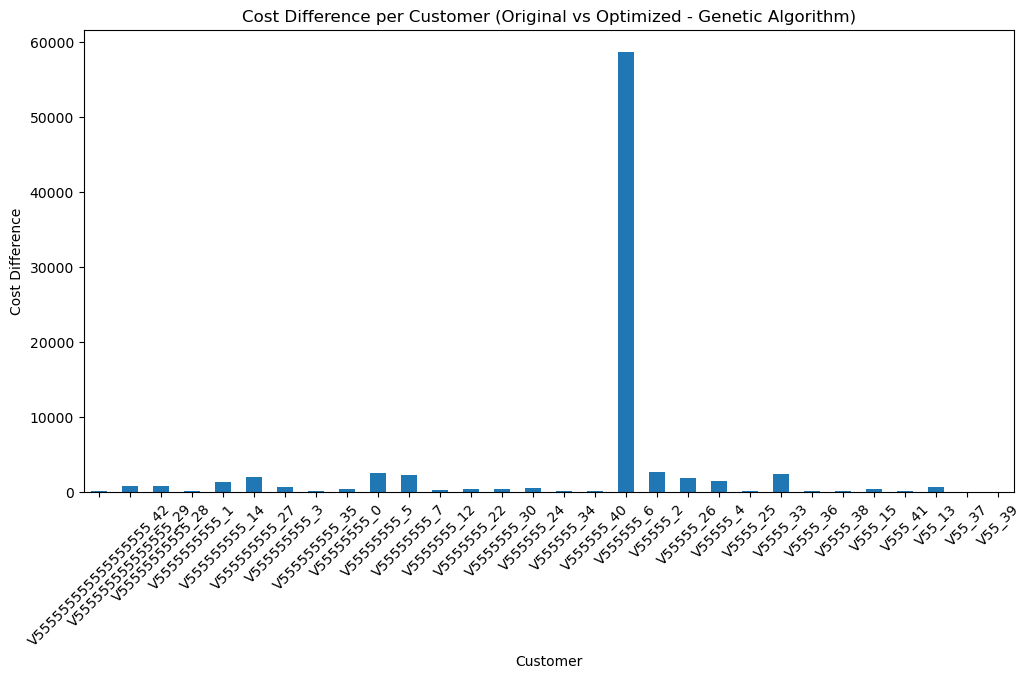

In [32]:


# Assuming logistics_costs contains the logistics costs for each order after the GA
# Creating a DataFrame from the logistics_costs dictionary
ga_costs_df = pd.DataFrame(list(logistics_costs.items()), columns=['Order ID', 'Logistics Cost_GA'])

# Merge this with the original order_list to associate each cost with the corresponding customer
merged_order_list = order_list.merge(ga_costs_df, on='Order ID')

# Group by Customer and sum the logistics costs for each customer after GA optimization
optimized_total_costs_by_customer_GA = merged_order_list.groupby('Customer')['Logistics Cost_GA'].sum()

# Assuming original_total_costs_by_customer contains the summed original logistics costs per customer
# Calculate the difference in costs between the original and GA optimized costs
cost_difference_by_customer_GA = original_total_costs_by_customer - optimized_total_costs_by_customer_GA

# Plotting a bar graph
plt.figure(figsize=(12, 6))
cost_difference_by_customer_GA.plot(kind='bar')
plt.title('Cost Difference per Customer (Original vs Optimized - Genetic Algorithm)')
plt.xlabel('Customer')
plt.ylabel('Cost Difference')
plt.xticks(rotation=45)
plt.show()


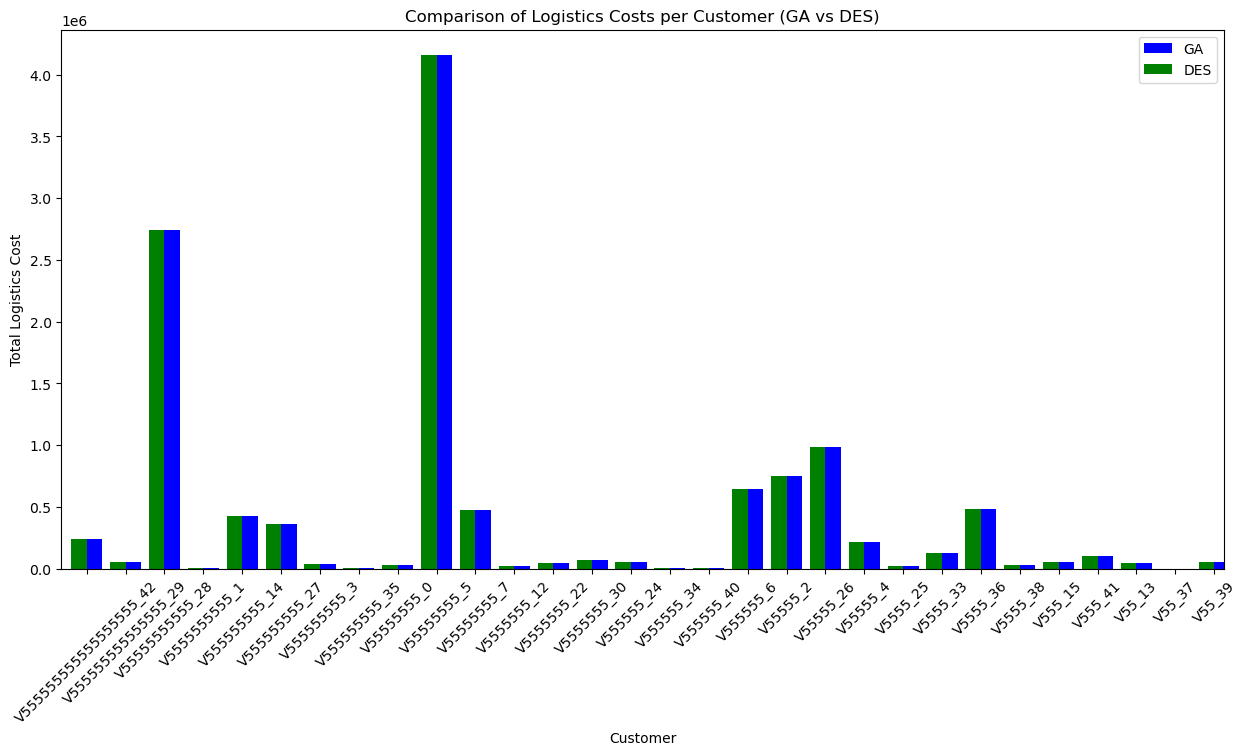

In [36]:


# Assuming logistics_costs contains the logistics costs for each order after the GA
ga_costs_df = pd.DataFrame(list(logistics_costs.items()), columns=['Order ID', 'Logistics Cost_GA'])

# Merge GA costs with the original order_list to associate each cost with the corresponding customer
merged_order_list_ga = order_list.merge(ga_costs_df, on='Order ID')

# Group by Customer and sum the logistics costs for each customer after GA optimization
optimized_total_costs_by_customer_GA = merged_order_list_ga.groupby('Customer')['Logistics Cost_GA'].sum()

# Assuming optimized_total_costs_by_customer_DES already contains the summed logistics costs per customer after DES simulation
# (You should ensure this variable is correctly calculated from your DES model results)
optimized_total_costs_by_customer_DES = merged_order_list.groupby('Customer')['Logistics Cost_DES'].sum()

# Plotting a comparison graph
plt.figure(figsize=(15, 7))
optimized_total_costs_by_customer_GA.plot(kind='bar', color='blue', position=0, width=0.4, label='GA')
optimized_total_costs_by_customer_DES.plot(kind='bar', color='green', position=1, width=0.4, label='DES')

plt.title('Comparison of Logistics Costs per Customer (GA vs DES)')
plt.xlabel('Customer')
plt.ylabel('Total Logistics Cost')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [37]:
# Calculate the overall logistics costs from both GA and DES
total_logistics_cost_GA = optimized_total_costs_by_customer_GA.sum()
total_logistics_cost_DES = optimized_total_costs_by_customer_DES.sum()

# Calculate the difference in total logistics costs between GA and DES
cost_difference = total_logistics_cost_GA - total_logistics_cost_DES

# Display the results
print("Total Logistics Cost - Genetic Algorithm: ", total_logistics_cost_GA)
print("Total Logistics Cost - Discrete Event Simulation: ", total_logistics_cost_DES)
print("Cost Difference (GA - DES): ", cost_difference)


Total Logistics Cost - Genetic Algorithm:  12242746.889428291
Total Logistics Cost - Discrete Event Simulation:  12242746.889428291
Cost Difference (GA - DES):  0.0


In [ ]:
#DES worked just as good at Genetic Algorithm with a much shorter running time
#Both GA and DES might have converged to the same optimal solution. This could happen if there's a 
#clear best solution for the logistics cost optimization problem, and both methods are effective enough to find it.
#Similar Methodologies: If the methodologies used in GA and DES for calculating logistics costs and making decisions 
#(like carrier and port assignments) are similar, they might naturally lead to the same results. 
#This could happen if the cost structure and constraints are 
#straightforward and don't leave much room for variation in the optimization process which was the case here.